In [192]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json 
from itertools import chain 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [193]:
df_csv = pd.read_csv('imdb_csv.csv', index_col=[0])
df_csv

,title,year,kind,rating,vote,runtime
0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50
1,Character,2021,movie,8.3,46.0,125
2,Get Up and Dance!,1994,video movie,8.1,18.0,54
3,The Rise and Fall of El Chapo,2016,tv movie,6.9,42.0,85
5,8 Man,1992,movie,5.5,93.0,83
...,...,...,...,...,...,...
9821,All Monsters Attack,1969,movie,3.9,4384.0,69
9822,Fidel Castro,2005,episode,6.4,44.0,0
9823,Epoch,2001,tv movie,4.9,2376.0,96
9824,The Company,2003,movie,6.3,6501.0,112


In [194]:
# Load the json data
with open('imdb_json.json') as f:
  data = json.load(f)

# Extract the year and movie data into separate variables  
years = list(data.keys())

y = []
m= []

for year in years:
    for i, movie in enumerate(data[year]):
             y.append(year)
             m.append(list(movie.keys())[0])
             
df_json = pd.DataFrame({'year': y, 'title':m})

df_json[['composer','cast' ,'language','director','country','genre','writer']] = None

j = 0
for year in years:
    for i, movie in enumerate(data[year]):
          
          list(movie[df_json.iloc[j,1]].values())

          df_json.iloc[j,2:] = pd.json_normalize(movie[df_json.iloc[j,1]]).values[0]

          j+=1

In [195]:
df_json

,year,title,composer,cast,language,director,country,genre,writer
0,2003,Dinosaur Planet,NaN,"[Christian Slater, Scott Sampson]",[English],NaN,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]"
1,2003,Daydream Obsession,NaN,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough]
2,2003,The Bonesetter,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly]
3,2003,Carandiru,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]"
4,2003,DarkWolf,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre..."
...,...,...,...,...,...,...,...,...,...
9170,1935,The 39 Steps,"[Jack Beaver, Louis Levy]","[Robert Donat, Madeleine Carroll, Lucie Mannhe...",[English],[Alfred Hitchcock],[United Kingdom],"[Crime, Mystery, Thriller]","[John Buchan, Charles Bennett, Ian Hay]"
9171,1913,The Special Officer,NaN,"[Edwin Barbour, Kempton Greene, Frankie Mann, ...","[None, English]",[Lloyd B. Carleton],[United States],"[Short, Drama]",NaN
9172,1914,The Perils of Pauline,NaN,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...","[None, English]","[Louis J. Gasnier, Donald MacKenzie]",[United States],"[Action, Adventure, Drama]","[Charles W. Goddard, Basil Dickey, Charles W. ..."
9173,1924,The Marriage Circle,NaN,"[Florence Vidor, Monte Blue, Marie Prevost, Cr...",[English],[Ernst Lubitsch],[United States],[Comedy],"[Paul Bern, Lothar Schmidt]"


# PROBLEM IDENTIFICATION

This dataset contains the information about the movies . For a movie to be commercial success , it depends on various factors like director, cast ,genre, and writer. The rating is one of the important factor to measure the movie's success.

We analyze each and every factors which can influence the movie ratings so that we can predict waht rating each movie should recive. The movie with the higher rating  is more successful as compared to the movies with low rating. 

In [196]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9756 entries, 0 to 9825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    9756 non-null   object 
 1   year     9756 non-null   int64  
 2   kind     9756 non-null   object 
 3   rating   8949 non-null   float64
 4   vote     8949 non-null   float64
 5   runtime  9756 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 533.5+ KB


In [197]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9175 entries, 0 to 9174
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      9175 non-null   object
 1   title     9175 non-null   object
 2   composer  6029 non-null   object
 3   cast      8907 non-null   object
 4   language  8581 non-null   object
 5   director  7664 non-null   object
 6   country   8639 non-null   object
 7   genre     9093 non-null   object
 8   writer    7684 non-null   object
dtypes: object(9)
memory usage: 645.2+ KB


#  Description of dataset attributes

Title: Title of the movie

year: The year in which the movie is released

Kind: Type of the movie

Rating: Rating of the movie

Vote: Number of people who voted for the movie

Runtime: movie duration in minutes

Composer: Name of the movie composer

Cast: Name of the movie cast

Language: Language of the movie

Director: Name of the movie director

Country: Country where movie is produced

Genre: Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’

Writer: Name of the movie writer

# DATA WRANGLING

First of all, we merge the two datasets and we evaluate the quality of the data.

Year and title are the same attribute in both dataset, so we make sure that they are in the same datatypes so that we can merge the datasets using inner join. 



In [198]:
df_json.shape

(9175, 9)

In [199]:
df_csv.shape

(9756, 6)

In [200]:
df_csv['year']= df_csv['year'].astype('int')

In [201]:
df_json['year']= df_json['year'].astype('int')

In [202]:
# Merge the two dataframes on 'title' and 'year' using an inner join
merged_df = pd.merge(df_json, df_csv, how='inner', on=['title','year'])

In [203]:
merged_df

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime
0,2003,Dinosaur Planet,NaN,"[Christian Slater, Scott Sampson]",[English],NaN,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]",tv mini series,7.7,474.0,50
1,2003,Daydream Obsession,NaN,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough],video movie,2.8,120.0,87
2,2003,The Bonesetter,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly],video movie,1.6,210.0,72
3,2003,Carandiru,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]",movie,7.6,18930.0,145
4,2003,DarkWolf,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre...",video movie,2.7,1662.0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,1935,The 39 Steps,"[Jack Beaver, Louis Levy]","[Robert Donat, Madeleine Carroll, Lucie Mannhe...",[English],[Alfred Hitchcock],[United Kingdom],"[Crime, Mystery, Thriller]","[John Buchan, Charles Bennett, Ian Hay]",movie,7.6,54484.0,86
9752,1913,The Special Officer,NaN,"[Edwin Barbour, Kempton Greene, Frankie Mann, ...","[None, English]",[Lloyd B. Carleton],[United States],"[Short, Drama]",NaN,movie,NaN,NaN,0
9753,1914,The Perils of Pauline,NaN,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...","[None, English]","[Louis J. Gasnier, Donald MacKenzie]",[United States],"[Action, Adventure, Drama]","[Charles W. Goddard, Basil Dickey, Charles W. ...",movie,6.3,1022.0,199
9754,1924,The Marriage Circle,NaN,"[Florence Vidor, Monte Blue, Marie Prevost, Cr...",[English],[Ernst Lubitsch],[United States],[Comedy],"[Paul Bern, Lothar Schmidt]",movie,7.1,1218.0,85


In [204]:
merged_df.shape

(9756, 13)

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9756 entries, 0 to 9755
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      9756 non-null   int64  
 1   title     9756 non-null   object 
 2   composer  6197 non-null   object 
 3   cast      9444 non-null   object 
 4   language  9004 non-null   object 
 5   director  7937 non-null   object 
 6   country   9114 non-null   object 
 7   genre     9667 non-null   object 
 8   writer    8124 non-null   object 
 9   kind      9756 non-null   object 
 10  rating    8949 non-null   float64
 11  vote      8949 non-null   float64
 12  runtime   9756 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [15]:
# Summary statistics for numerical columns
print(merged_df.describe())

              year       rating          vote      runtime
count  9756.000000  8949.000000  8.949000e+03  9756.000000
mean   1994.739750     6.680635  2.121821e+04    88.129356
std      16.245087     1.285113  9.804873e+04    67.251045
min    1905.000000     1.000000  5.000000e+00     0.000000
25%    1989.750000     6.000000  2.830000e+02    60.000000
50%    1999.000000     6.900000  1.535000e+03    92.000000
75%    2003.000000     7.600000  7.570000e+03   107.000000
max    2023.000000     9.600000  2.462087e+06  1620.000000


# Removing Duplicates

In [205]:
# Check for duplicate rows
duplicates = merged_df.duplicated(['title', 'year'])
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 581


In [17]:
merged_df.loc[duplicates]

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime
19,2003,The Matrix Revolutions,[Don Davis],"[Mary Alice, Tanveer K. Atwal, Helmut Bakaitis...","[English, French]","[Lana Wachowski, Lilly Wachowski]",[United States],"[Action, Sci-Fi]","[Lilly Wachowski, Lana Wachowski, Lilly Wachow...",movie,6.8,466405.0,129
91,2003,The Blind Swordsman: Zatoichi,[Keiichi Suzuki],"[Takeshi Kitano, Tadanobu Asano, Michiyo Yasud...",[Japanese],[Takeshi Kitano],[Japan],"[Action, Comedy, Crime, Drama, Thriller]","[Takeshi Kitano, Kan Shimozawa]",movie,7.5,48512.0,116
104,2003,Smallville Season 3 Promo,NaN,[Tom Welling],[English],[David Zimring],[United States],"[Short, Adventure, Drama, Romance, Sci-Fi]",[David Zimring],tv short,9.2,58.0,4
105,2003,Smallville Season 3 Promo,NaN,[Tom Welling],[English],[David Zimring],[United States],"[Short, Adventure, Drama, Romance, Sci-Fi]",[David Zimring],tv short,9.2,58.0,4
106,2003,Smallville Season 3 Promo,NaN,[Tom Welling],[English],[David Zimring],[United States],"[Short, Adventure, Drama, Romance, Sci-Fi]",[David Zimring],tv short,9.2,58.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9670,1946,The Razor's Edge,[Alfred Newman],"[Tyrone Power, Gene Tierney, John Payne, Anne ...","[English, French]",[Edmund Goulding],[United States],"[Drama, Romance]","[Lamar Trotti, W. Somerset Maugham, Darryl F. ...",movie,7.4,5802.0,145
9680,1918,Charlie Chaplin: The Essanay Comedies,NaN,"[Charles Chaplin, Edna Purviance]","[None, English]",NaN,[United Kingdom],[Comedy],NaN,movie,7.7,12.0,402
9681,1918,Charlie Chaplin: The Essanay Comedies,NaN,"[Charles Chaplin, Edna Purviance]","[None, English]",NaN,[United Kingdom],[Comedy],NaN,movie,7.7,12.0,402
9693,1952,Ikiru,[Fumio Hayasaka],"[Takashi Shimura, ""Shin'ichi Himori"", Haruo Ta...",[Japanese],[Akira Kurosawa],[Japan],[Drama],"[Akira Kurosawa, Shinobu Hashimoto, Hideo Oguni]",movie,8.3,73593.0,143


In [206]:
merged_df.loc[merged_df.title== 'The Matrix Revolutions']

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime
18,2003,The Matrix Revolutions,[Don Davis],"[Mary Alice, Tanveer K. Atwal, Helmut Bakaitis...","[English, French]","[Lana Wachowski, Lilly Wachowski]",[United States],"[Action, Sci-Fi]","[Lilly Wachowski, Lana Wachowski, Lilly Wachow...",movie,6.8,466400.0,129
19,2003,The Matrix Revolutions,[Don Davis],"[Mary Alice, Tanveer K. Atwal, Helmut Bakaitis...","[English, French]","[Lana Wachowski, Lilly Wachowski]",[United States],"[Action, Sci-Fi]","[Lilly Wachowski, Lana Wachowski, Lilly Wachow...",movie,6.8,466405.0,129


In [207]:
# Remove duplicates if any and keep the first one,
merged_df = merged_df.drop_duplicates(['title', 'year'])
print("Duplicates removed")

Duplicates removed


# Evaluate Missing Values

In [208]:
# Check for null values
missing = pd.concat([merged_df.isnull().sum(), 100 * merged_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
composer,3146,34.288828
director,1511,16.468665
writer,1491,16.250681
rating,666,7.258856
vote,666,7.258856
language,594,6.474114
country,536,5.841962
cast,268,2.920981
genre,82,0.893733
year,0,0.000000


In [209]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9175 entries, 0 to 9755
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      9175 non-null   int64  
 1   title     9175 non-null   object 
 2   composer  6029 non-null   object 
 3   cast      8907 non-null   object 
 4   language  8581 non-null   object 
 5   director  7664 non-null   object 
 6   country   8639 non-null   object 
 7   genre     9093 non-null   object 
 8   writer    7684 non-null   object 
 9   kind      9175 non-null   object 
 10  rating    8509 non-null   float64
 11  vote      8509 non-null   float64
 12  runtime   9175 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 1003.5+ KB


## Handling Missing Values in Categorical Features
For now we do not want to loose any information, so we replace any missing values in the categorical features with "unknown"

In [210]:
merged_df['director'].fillna('Unknown', inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/780842524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['director'].fillna('Unknown', inplace=True)


In [211]:
merged_df['composer'].fillna('Unknown', inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/3919786848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['composer'].fillna('Unknown', inplace=True)


In [212]:
merged_df['writer'].fillna('Unknown', inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/2869516501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['writer'].fillna('Unknown', inplace=True)


In [213]:
merged_df['cast'].fillna('Unknown', inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/1170775855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['cast'].fillna('Unknown', inplace=True)


In [214]:
merged_df['language'].fillna('Unknown', inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/3238998654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['language'].fillna('Unknown', inplace=True)


In [215]:
merged_df['country'].fillna('Unknown', inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/1013457907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['country'].fillna('Unknown', inplace=True)


In [216]:
merged_df['genre'].fillna('Unknown', inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/2865099577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['genre'].fillna('Unknown', inplace=True)


In [217]:
merged_df.isnull().sum()

year          0
title         0
composer      0
cast          0
language      0
director      0
country       0
genre         0
writer        0
kind          0
rating      666
vote        666
runtime       0
dtype: int64

## Handling Missing Values in Numerical Features

In [218]:
# Fill null values in numerical columns with median
merged_df['rating'].fillna(merged_df['rating'].median(), inplace=True)
merged_df['vote'].fillna(merged_df['vote'].median(), inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/2113028015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['rating'].fillna(merged_df['rating'].median(), inplace=True)
/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/2113028015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['vote'].fillna(merged_df['vote'].median(), inplace=True)


# EXPLORATOY DATA ANALYSIS (EDA)

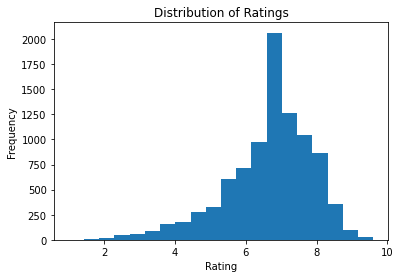

In [219]:
# Analyze the distribution of ratings
plt.hist(merged_df['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

The distribution of rating is slightly skewed and most rating is between 6 to 8.  

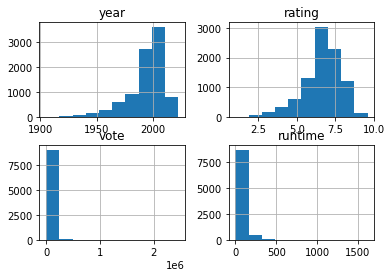

In [220]:
merged_df.hist()
plt.show()

In [221]:
df_cast= merged_df.explode('cast')
df_language = merged_df.explode('language')
df_writer = merged_df.explode('writer')
df_country = merged_df.explode('country')
df_genres = merged_df.explode('genre')

genre_stats = df_genres.groupby('genre')['runtime'].describe()
print(genre_stats)


              count        mean         std   min    25%    50%     75%  \
genre                                                                     
Action       1525.0   93.196721   51.231558   0.0  83.00   95.0  109.00   
Adventure    1086.0   86.212707   62.123201   0.0  50.00   90.0  105.00   
Animation     863.0   55.714948   58.693923   0.0  24.00   46.0   80.50   
Biography     492.0  104.922764   53.704423   0.0  87.00  101.0  120.00   
Comedy       2583.0   83.518389   43.415618   0.0  67.00   92.0  104.00   
Crime        1127.0  100.803017   51.551749   0.0  90.00   99.0  111.00   
Documentary  1478.0   81.290934   75.936977   0.0  50.00   79.0   98.00   
Drama        3841.0  107.616506   67.922172   0.0  90.00  101.0  118.00   
Family        854.0   67.515222   62.508985   0.0  30.00   72.0   92.00   
Fantasy       807.0   82.938042   62.219464   0.0  48.00   88.0  100.00   
Film-Noir      26.0   97.000000   14.694217  60.0  90.00   97.0  104.75   
Game-Show      20.0   41.

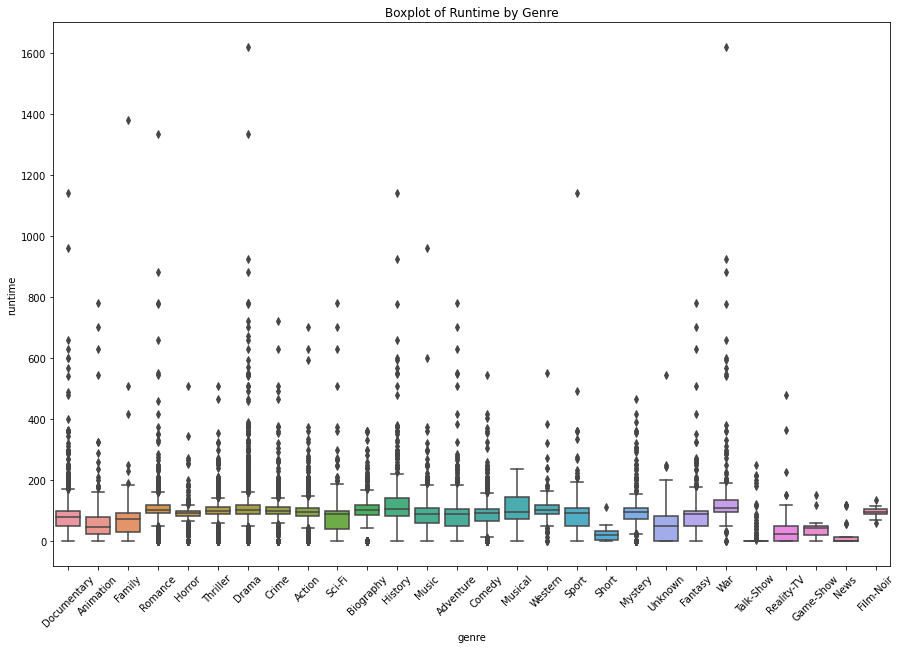

In [225]:
plt.figure(figsize=(15,10))
sns.boxplot(x='genre', y='runtime', data=df_genres)
plt.xticks(rotation=45)
plt.title("Boxplot of Runtime by Genre")
plt.show()





In [226]:
# Create a list of runtimes for each genre
runtimes = [df_genres['runtime'][df_genres['genre'] == genre] for genre in df_genres['genre'].unique()]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*runtimes)
print("F-statistic:", f_stat)
print("P-value:", p_value)



F-statistic: 81.9893236148848
P-value: 0.0


In [174]:
result = pairwise_tukeyhsd(df_genres['runtime'], df_genres['genre'])
print(result)


merged_df.columns



/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
     Action   Adventure   -7.5277 0.3633  -16.9058   1.8503  False
     Action   Animation  -36.7568   -0.0  -46.7154 -26.7983   True
     Action   Biography   11.5089 0.1016   -0.7383   23.756  False
     Action      Comedy   -9.5795 0.0011  -17.2083  -1.9508   True
     Action       Crime    8.3995  0.152   -0.9157  17.7146  False
     Action Documentary  -11.0534 0.0006   -19.593  -2.5138   True
     Action       Drama   15.0717   -0.0    7.9156  22.2279   True
     Action      Family  -24.8756   -0.0  -35.0016 -14.7497   True
     Action     Fantasy   -9.8163 0.0847  -20.0856    0.453  False
     Action   Game-Show  -51.1932 0.0615 -103.2644   0.8779  False
     Action     History   34.5128   -0.0   21.8634  47.1621   True
     Action      Horror   -4.6059 0.9968  -14.7523   5.5406  F

Index(['year', 'title', 'composer', 'cast', 'language', 'director', 'country',
       'genre', 'writer', 'kind', 'rating', 'vote', 'runtime', 'age'],
      dtype='object')

/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


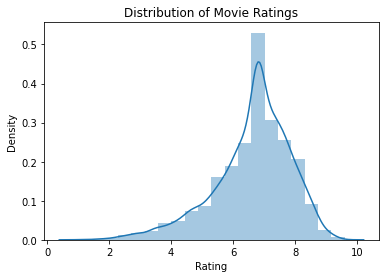

In [175]:
#Distribution of Rating
sns.distplot(merged_df['rating'] , bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

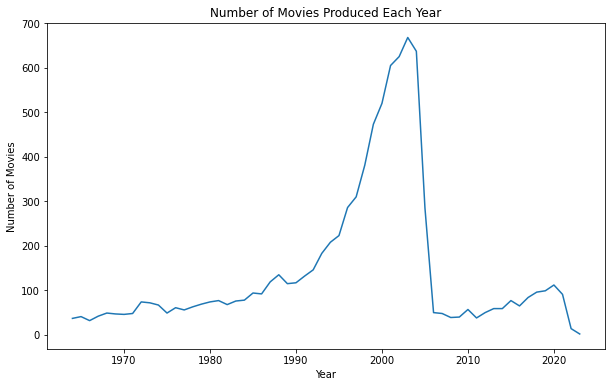

In [176]:
#Number of Movies produce each year
merged_df['year'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title('Number of Movies Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()





In [178]:
merged_df.isna().sum()
df_genres = df_genres[['title', 'genre']]
merged_df = pd.merge(merged_df, df_genres, on='title', how='inner')
merged_df.isna().sum()
df_cast =df_cast[['title', 'cast']]
merged_df = pd.merge(merged_df, df_cast, on='title', how='inner')
df_language =df_language[['title', 'language']]
merged_df = pd.merge(merged_df, df_language, on='title', how='inner')
df_writer =df_writer[['title', 'writer']]
merged_df = pd.merge(merged_df, df_writer, on='title', how='inner')
df_country =df_country[['title', 'country']]
merged_df = pd.merge(merged_df, df_country, on='title', how='inner')
merged_df



,year,title,composer,kind,rating,vote,runtime,age,genre,cast,language,writer,country
0,2003,Dinosaur Planet,Unknown,tv mini series,7.7,474.0,50,20,Documentary,Christian Slater,English,Mike Carrol,United States
1,2003,Dinosaur Planet,Unknown,tv mini series,7.7,474.0,50,20,Documentary,Christian Slater,English,Mike Carroll,United States
2,2003,Dinosaur Planet,Unknown,tv mini series,7.7,474.0,50,20,Documentary,Christian Slater,English,Georgann Kane,United States
3,2003,Dinosaur Planet,Unknown,tv mini series,7.7,474.0,50,20,Documentary,Scott Sampson,English,Mike Carrol,United States
4,2003,Dinosaur Planet,Unknown,tv mini series,7.7,474.0,50,20,Documentary,Scott Sampson,English,Mike Carroll,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163853,1964,Zulu,[John Barry],movie,7.7,37658.0,138,59,War,Tony Snell,Zulu,Cy Endfield,United Kingdom
4163854,1964,Zulu,[John Barry],movie,7.7,37658.0,138,59,War,Tony Snell,Zulu,John Prebble,United Kingdom
4163855,2023,Harold and the Purple Crayon,Unknown,movie,6.8,1477.0,0,0,Animation,Zachary Levi,Unknown,Dallas Clayton,United States
4163856,2023,Harold and the Purple Crayon,Unknown,movie,6.8,1477.0,0,0,Animation,Zachary Levi,Unknown,David Guion,United States


In [227]:
# Unfold the 'director' column and create a new DataFrame
directors = []
titles = []
genres = []

for title, director, genre in zip(merged_df['title'], new_df['director'], new_df['genre']):
    if isinstance(director, list):
        directors.extend(director)
        titles.extend([title] * len(director))
        genres.extend([genre]* len(director))
    else:
        directors.append(director)
        titles.append(title)
        genres.append(genre)

director_df = pd.DataFrame({'director': directors, 'title': titles})

# Reset index
director_df.reset_index(drop=True, inplace=True)
director_df

,director,title
0,Thomas R. Smyth,Dinosaur Planet
1,Brett Kelly,Daydream Obsession
2,Hector Babenco,The Bonesetter
3,Richard Friedman,Carandiru
4,Ann Hui,DarkWolf
...,...,...
7888,Alfred Hitchcock,Bruce Lee's Jeet Kune Do
7889,John Rich,Species
7890,Cy Endfield,Unzipped
7891,Unknown,Fluke


# Creating Movie Age Feature

In [33]:
#We create a new feature to show the age of the movie
merged_df['age']= 2023 - merged_df['year'] 


/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/4098561689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['age']= 2023 - merged_df['year']


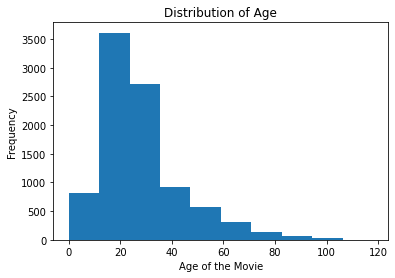

In [34]:
plt.hist(merged_df['age'])
plt.xlabel('Age of the Movie')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Most of the movie age is between 18-38 years. The distribution ins rightly skewed. There a few movies that are more than 100 years old.

In [35]:
merged_df[merged_df['age']> 80]

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime,age
7842,1919,Broken Blossoms,Unknown,"[Lillian Gish, Richard Barthelmess, Donald Cri...",[English],[D.W. Griffith],[United States],"[Drama, Romance]","[Thomas Burke, D.W. Griffith]",movie,7.3,9947.0,90,104
7951,1942,Saludos Amigos,"[Edward H. Plumb, Paul J. Smith, Frank Churchill]","[Fred Shields, José Oliveira, Lee Blair, Mary ...","[English, Portuguese]","[Wilfred Jackson, Jack Kinney, Hamilton Luske]","[United States, Brazil, Bolivia]","[Animation, Short, Adventure, Comedy, Family, ...","[Ted Sears, William Cottrell, Webb Smith]",movie,6.1,6167.0,42,81
7952,1942,Three Smart Saps,Unknown,Unknown,Unknown,Unknown,Unknown,[Comedy],Unknown,episode,6.8,1477.0,0,81
7953,1942,A Tale of Two Kitties,[Carl W. Stalling],"[Mel Blanc, Tedd Pierce]",[English],[Robert Clampett],[United States],"[Animation, Family, Short, Comedy]",[Warren Foster],movie,7.3,950.0,7,81
7954,1942,The Ghost of Frankenstein,[Hans J. Salter],"[Lon Chaney Jr., Cedric Hardwicke, Ralph Bella...",[English],[Erle C. Kenton],[United States],"[Drama, Horror, Sci-Fi]","[Scott Darling, Eric Taylor]",movie,6.1,5866.0,67,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,1935,The 39 Steps,"[Jack Beaver, Louis Levy]","[Robert Donat, Madeleine Carroll, Lucie Mannhe...",[English],[Alfred Hitchcock],[United Kingdom],"[Crime, Mystery, Thriller]","[John Buchan, Charles Bennett, Ian Hay]",movie,7.6,54484.0,86,88
9752,1913,The Special Officer,Unknown,"[Edwin Barbour, Kempton Greene, Frankie Mann, ...","[None, English]",[Lloyd B. Carleton],[United States],"[Short, Drama]",Unknown,movie,6.8,1477.0,0,110
9753,1914,The Perils of Pauline,Unknown,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...","[None, English]","[Louis J. Gasnier, Donald MacKenzie]",[United States],"[Action, Adventure, Drama]","[Charles W. Goddard, Basil Dickey, Charles W. ...",movie,6.3,1022.0,199,109
9754,1924,The Marriage Circle,Unknown,"[Florence Vidor, Monte Blue, Marie Prevost, Cr...",[English],[Ernst Lubitsch],[United States],[Comedy],"[Paul Bern, Lothar Schmidt]",movie,7.1,1218.0,85,99


We can see that there are 116 movies with more than 60 years old. We droped these movies as there are outliers in our datasets. 

In [36]:
merged_df= merged_df[merged_df['age']< 60]
merged_df

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime,age
0,2003,Dinosaur Planet,Unknown,"[Christian Slater, Scott Sampson]",[English],Unknown,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]",tv mini series,7.7,474.0,50,20
1,2003,Daydream Obsession,Unknown,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough],video movie,2.8,120.0,87,20
2,2003,The Bonesetter,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly],video movie,1.6,210.0,72,20
3,2003,Carandiru,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]",movie,7.6,18930.0,145,20
4,2003,DarkWolf,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre...",video movie,2.7,1662.0,94,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,1964,Marnie,[Bernard Herrmann],"[Tippi Hedren, Martin Gabel, Sean Connery, Lou...",[English],[Alfred Hitchcock],[United States],"[Crime, Drama, Mystery, Romance, Thriller]","[Winston Graham, Jay Presson Allen]",movie,7.1,47190.0,130,59
9633,1964,Roustabout,[Joseph J. Lilley],"[Elvis Presley, Barbara Stanwyck, Joan Freeman...",[English],[John Rich],[United States],"[Drama, Music, Musical, Romance]","[Anthony Lawrence, Allan Weiss, Allan Weiss]",movie,6.0,2760.0,101,59
9634,1964,Zulu,[John Barry],"[Stanley Baker, Jack Hawkins, Ulla Jacobsson, ...","[English, Zulu]",[Cy Endfield],[United Kingdom],"[Drama, History, War]","[John Prebble, Cy Endfield, John Prebble]",movie,7.7,37658.0,138,59
9744,2023,Harold and the Purple Crayon,Unknown,[Zachary Levi],Unknown,Unknown,[United States],[Animation],"[Dallas Clayton, David Guion, Michael Handelman]",movie,6.8,1477.0,0,0


Let's check the distribution of age agin. 

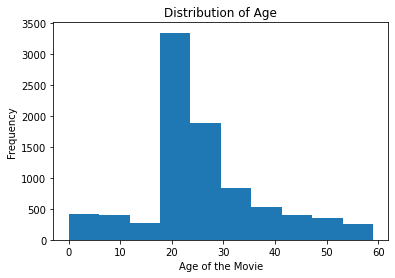

In [37]:
plt.hist(merged_df['age'])
plt.xlabel('Age of the Movie')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Exploring the number of Vote

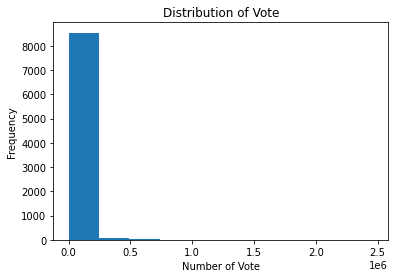

In [38]:
plt.hist(merged_df['vote'])
plt.xlabel('Number of Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Vote')
plt.show()

# Movies with Higher Number of Votes

In [39]:
merged_df[merged_df['vote']> 1000000]

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime,age
94,2003,The Lord of the Rings: The Return of the King,[Howard Shore],"[Noel Appleby, Ali Astin, Sean Astin, David As...","[English, Quenya, Old English, Sindarin]",[Peter Jackson],"[New Zealand, United States]","[Action, Adventure, Drama, Fantasy]","[J.R.R. Tolkien, Fran Walsh, Philippa Boyens]",movie,8.9,1708569.0,201,20
479,2003,Pirates of the Caribbean: The Curse of the Bla...,[Klaus Badelt],"[Johnny Depp, Geoffrey Rush, Orlando Bloom, Ke...",[English],[Gore Verbinski],[United States],"[Action, Adventure, Fantasy]","[Ted Elliott, Terry Rossio, Stuart Beattie]",movie,8.0,1044629.0,143,20
516,2003,Kill Bill: Vol. 1,[RZA],"[Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl H...","[English, Japanese, French]",[Quentin Tarantino],"[United States, Hong Kong]","[Action, Crime, Drama, Thriller]","[Quentin Tarantino, Quentin Tarantino, Uma Thu...",movie,8.1,1045060.0,111,20
801,1994,The Shawshank Redemption,[Thomas Newman],"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[English],[Frank Darabont],[United States],[Drama],"[Stephen King, Frank Darabont]",movie,9.3,2461873.0,142,29
803,1994,Léon: The Professional,[Éric Serra],"[Jean Reno, Gary Oldman, Natalie Portman, Dann...","[English, Italian, French]",[Luc Besson],"[France, United States]","[Action, Crime, Drama, Thriller]",[Luc Besson],movie,8.5,1080665.0,110,29
850,1994,Pulp Fiction,Unknown,"[Tim Roth, Amanda Plummer, Laura Lovelace, Joh...","[English, Spanish, French]",[Quentin Tarantino],[United States],"[Crime, Drama]","[Quentin Tarantino, Roger Avary, Quentin Taran...",movie,8.9,1907147.0,154,29
1974,1991,Terminator 2: Judgment Day,[Brad Fiedel],"[Arnold Schwarzenegger, Linda Hamilton, Edward...","[English, Spanish]",[James Cameron],[United States],"[Action, Sci-Fi]","[James Cameron, William Wisher]",movie,8.5,1033000.0,137,32
2594,1999,The Matrix,[Don Davis],"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...",[English],"[Lana Wachowski, Lilly Wachowski]","[United States, Australia]","[Action, Sci-Fi]","[Lilly Wachowski, Lana Wachowski]",movie,8.7,1755454.0,136,24
2659,1999,The Green Mile,[Thomas Newman],"[Tom Hanks, David Morse, Bonnie Hunt, Michael ...","[English, French]",[Frank Darabont],[United States],"[Crime, Drama, Fantasy, Mystery]","[Stephen King, Frank Darabont]",movie,8.6,1202576.0,189,24
3292,1972,The Godfather,[Nino Rota],"[Marlon Brando, Al Pacino, James Caan, Richard...","[English, Italian, Latin]",[Francis Ford Coppola],[United States],"[Crime, Drama]","[Mario Puzo, Francis Ford Coppola, Mario Puzo]",movie,9.2,1702698.0,175,51


# Movie Duration

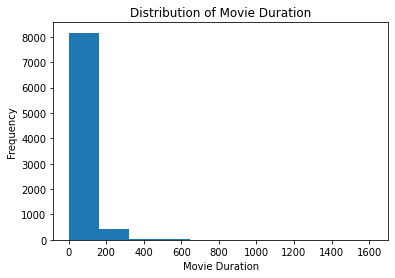

In [40]:
plt.hist(merged_df['runtime'])
plt.xlabel('Movie Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Duration')
plt.show()

In [41]:
merged_df[merged_df['runtime']> 300]

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime,age
47,2003,Wolf's Rain,Unknown,"[Darren Pleavin, Kenta Miyake, Akio Suyama, Cr...","[Japanese, English]",Unknown,[Japan],"[Action, Sci-Fi, Animation, Fantasy, Adventure...","[Keiko Nobumoto, Lia Sargent, Lia Sargent]",tv series,8.0,7467.0,701,20
202,2003,WWE from the Vault: Shawn Michaels,Unknown,"[Mark Calaway, Mick Foley, Scott Hall, Bret Ha...",[English],[Kevin Dunn],[United States],[Sport],Unknown,video movie,6.9,54.0,360,20
223,2003,Playmakers,Unknown,"[Tony Denison, Omar Gooding, Russell Hornsby, ...",[English],Unknown,[United States],"[Crime, Drama, Sport]","[John Eisendrath, John Eisendrath, Peter Egan]",tv series,8.5,1317.0,491,20
279,2003,The Rolling Stones: Four Flicks (2003),Unknown,"[The Rolling Stones, AC/DC, Solomon Burke, Blo...",[English],"[Justin Bomberg, Marty Callner, Jacob Cohl]",[United States],Unknown,Unknown,video movie,8.7,94.0,545,20
370,2003,Angels in America,Unknown,"[Al Pacino, Mary-Louise Parker, Justin Kirk, J...","[English, Hebrew, Aramaic, Yiddish, French]",Unknown,"[United States, Italy]","[Drama, Fantasy, Romance]","[Tony Kushner, Tony Kushner, Tony Kushner]",tv mini series,8.2,27000.0,352,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,1983,The Winds of War,Unknown,"[Robert Mitchum, Ali MacGraw, Jan-Michael Vinc...","[English, German, Italian, Polish, Portuguese,...",Unknown,[United States],"[Drama, Romance, War]","[Herman Wouk, Herman Wouk, Herman Wouk]",tv mini series,8.1,3890.0,883,40
8844,1983,Vietnam: A Television History,Unknown,"[Will Lyman, Henry Kissinger, Tin Bui, Van Don...","[English, French, Vietnamese, Khmer]",Unknown,"[United States, United Kingdom, France]","[Documentary, History, War]","[Elizabeth Deane, Richard Ellison, Austin Hoyt]",tv mini series,8.8,307.0,660,40
8857,1983,The Thorn Birds,Unknown,"[Richard Chamberlain, Rachel Ward, Christopher...",[English],Unknown,[United States],"[Drama, Romance]","[Carmen Culver, Colleen McCullough, Lee Stanley]",tv mini series,7.9,8584.0,460,40
8905,1983,Reilly: Ace of Spies,Unknown,"[Sam Neill, Michael Bryant, Norman Rodway, Tom...",[English],Unknown,[United Kingdom],"[Crime, Drama]","[Troy Kennedy-Martin, R.H. Bruce Lockhart]",tv mini series,8.1,1450.0,720,40


It appears that most movies with duration more than 300 mintues are tv series. It would make sense to have a different model for movies  and tv series. Let't filter the datasets to include only movies. 

# Movie Kind

In [42]:
merged_df.kind.value_counts()

movie             4890
video movie       1345
episode            770
tv movie           761
tv series          588
tv mini series     267
video game          28
tv short            11
Name: kind, dtype: int64

For the movie rating prediction, we can only focused on Movie, video movie and tv movies. 

In [43]:
new_df = merged_df[(merged_df['kind'] == 'movie') | (merged_df['kind'] == 'tv movie') | (merged_df['kind'] == 'video movie')] 
new_df

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime,age
1,2003,Daydream Obsession,Unknown,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough],video movie,2.8,120.0,87,20
2,2003,The Bonesetter,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly],video movie,1.6,210.0,72,20
3,2003,Carandiru,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]",movie,7.6,18930.0,145,20
4,2003,DarkWolf,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre...",video movie,2.7,1662.0,94,20
5,2003,Goddess of Mercy,[Lin Zhao],"[Wei Zhao, Nicholas Tse, Yunlong Liu, Jianbin ...",[Mandarin],[Ann Hui],"[Hong Kong, China]","[Action, Crime, Drama, Romance]","[Ivy Ho, Hai Yan, Hai Yan]",movie,6.4,482.0,110,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,1964,Marnie,[Bernard Herrmann],"[Tippi Hedren, Martin Gabel, Sean Connery, Lou...",[English],[Alfred Hitchcock],[United States],"[Crime, Drama, Mystery, Romance, Thriller]","[Winston Graham, Jay Presson Allen]",movie,7.1,47190.0,130,59
9633,1964,Roustabout,[Joseph J. Lilley],"[Elvis Presley, Barbara Stanwyck, Joan Freeman...",[English],[John Rich],[United States],"[Drama, Music, Musical, Romance]","[Anthony Lawrence, Allan Weiss, Allan Weiss]",movie,6.0,2760.0,101,59
9634,1964,Zulu,[John Barry],"[Stanley Baker, Jack Hawkins, Ulla Jacobsson, ...","[English, Zulu]",[Cy Endfield],[United Kingdom],"[Drama, History, War]","[John Prebble, Cy Endfield, John Prebble]",movie,7.7,37658.0,138,59
9744,2023,Harold and the Purple Crayon,Unknown,[Zachary Levi],Unknown,Unknown,[United States],[Animation],"[Dallas Clayton, David Guion, Michael Handelman]",movie,6.8,1477.0,0,0


In [170]:
new_df.director.head(20)

1                         [Thomas R. Smyth]
2                             [Brett Kelly]
3                          [Hector Babenco]
4                        [Richard Friedman]
5                                 [Ann Hui]
6                              [Lisa Niemi]
7                            [Bryan Singer]
8                          [Jonathan Demme]
9                         [Hamish Hamilton]
10          [Saul Blinkoff, Elliot M. Bour]
12                   [Beth McCarthy-Miller]
13    [Simon Hilton, John Lennon, Yoko Ono]
14                         [Frank Q. Dobbs]
16              [Sydney J. Bartholomew Jr.]
17                            [Stan Kellam]
18        [Lana Wachowski, Lilly Wachowski]
21                                [Unknown]
23                      [Charles Wilkinson]
24          [Martyn Atkins, Keith Hobelman]
26                              [Ron Pitts]
Name: director, dtype: object

In [46]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'rating', data=new_df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Movie Rating')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

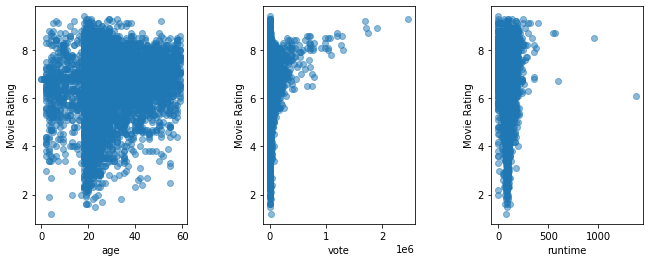

In [47]:
#Use a list comprehension to build a list of features from the columns of that are not any of categorical features. 
features = ['age', 'vote', 'runtime']
scatterplots(features, ncol=4, figsize=(15,4))

There is no significant correlation between movie rating and votes, age, and runtime.

In [48]:
new_df['language'].value_counts()

[English]                                 4284
[Japanese]                                 266
[Hindi]                                    195
[French]                                   156
[English, Spanish]                         111
                                          ... 
[Mandarin, Cantonese, English, Korean]       1
[English, Kinyarwanda]                       1
[English, Romanian, Latin, Greek]            1
[English, Bulgarian]                         1
[Japanese, Marshallese]                      1
Name: language, Length: 708, dtype: int64

In [49]:
# Check the first few rows to understand the data
new_df.head()


,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime,age
1,2003,Daydream Obsession,Unknown,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough],video movie,2.8,120.0,87,20
2,2003,The Bonesetter,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly],video movie,1.6,210.0,72,20
3,2003,Carandiru,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]",movie,7.6,18930.0,145,20
4,2003,DarkWolf,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre...",video movie,2.7,1662.0,94,20
5,2003,Goddess of Mercy,[Lin Zhao],"[Wei Zhao, Nicholas Tse, Yunlong Liu, Jianbin ...",[Mandarin],[Ann Hui],"[Hong Kong, China]","[Action, Crime, Drama, Romance]","[Ivy Ho, Hai Yan, Hai Yan]",movie,6.4,482.0,110,20


In [50]:
new_df.describe()

,year,rating,vote,runtime,age
count,6996.000000,6996.000000,6.996000e+03,6996.000000,6996.000000
mean,1996.283019,6.480961,2.061775e+04,95.267296,26.716981
std,11.332215,1.269131,9.309909e+04,43.433981,11.332215
min,1964.000000,1.200000,5.000000e+00,0.000000,0.000000
25%,1991.000000,5.800000,3.577500e+02,85.000000,20.000000
50%,1999.000000,6.700000,1.477000e+03,95.000000,24.000000
75%,2003.000000,7.300000,6.803000e+03,109.000000,32.000000
max,2023.000000,9.400000,2.461873e+06,1380.000000,59.000000


# Analyze Correlation between numerical features

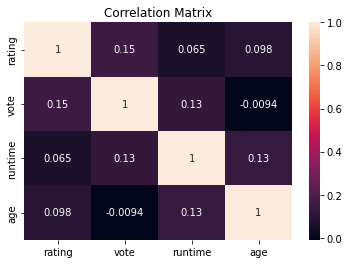

In [51]:
# Analyze correlation between numerical features
correlation_matrix = new_df[['rating', 'vote', 'runtime', 'age']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

The heatmap shows the correlation between numerical features like rating, vote, and runtime. There is a weak correlation between number of votes, rating and runtime.

# Exploring the Categorical Features

In [52]:
# Ensure the 'Cast' column contains lists
new_df['cast'] = new_df['cast'].apply(lambda x: x if isinstance(x, list) else [x])

# Ensure the 'Genre' column contains lists
new_df['genre'] = new_df['genre'].apply(lambda x: x if isinstance(x, list) else [x])


/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/1475527839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cast'] = new_df['cast'].apply(lambda x: x if isinstance(x, list) else [x])
/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/1475527839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['genre'] = new_df['genre'].apply(lambda x: x if isinstance(x, list) else [x])


In [53]:
# Ensure the 'language' column contains lists
new_df['language'] = new_df['language'].apply(lambda x: x if isinstance(x, list) else [x])

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/3916219161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['language'] = new_df['language'].apply(lambda x: x if isinstance(x, list) else [x])


In [54]:
# Ensure the 'director' column contains lists
new_df['director'] = new_df['director'].apply(lambda x: x if isinstance(x, list) else [x])

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/410087408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['director'] = new_df['director'].apply(lambda x: x if isinstance(x, list) else [x])


In [55]:
new_df['country'] = new_df['country'].apply(lambda x: x if isinstance(x, list) else [x])

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/2494666924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['country'] = new_df['country'].apply(lambda x: x if isinstance(x, list) else [x])


In [56]:
new_df['writer'] = new_df['writer'].apply(lambda x: x if isinstance(x, list) else [x])

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/1653397185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['writer'] = new_df['writer'].apply(lambda x: x if isinstance(x, list) else [x])


In [57]:
new_df['tags']=new_df['cast'] + new_df['director'] + new_df['country'] + new_df['genre']+ new_df['writer']+new_df['language']

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/2302814212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['cast'] + new_df['director'] + new_df['country'] + new_df['genre']+ new_df['writer']+new_df['language']


In [58]:
new_df.head()

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime,age,tags
1,2003,Daydream Obsession,Unknown,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough],video movie,2.8,120.0,87,20,"[Joe Dain, Kris Black, Julian Coca, Danny Dall..."
2,2003,The Bonesetter,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly],video movie,1.6,210.0,72,20,"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon..."
3,2003,Carandiru,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]",movie,7.6,18930.0,145,20,"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv..."
4,2003,DarkWolf,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre...",video movie,2.7,1662.0,94,20,"[Samaire Armstrong, Ryan Alosio, Andrea Bogart..."
5,2003,Goddess of Mercy,[Lin Zhao],"[Wei Zhao, Nicholas Tse, Yunlong Liu, Jianbin ...",[Mandarin],[Ann Hui],"[Hong Kong, China]","[Action, Crime, Drama, Romance]","[Ivy Ho, Hai Yan, Hai Yan]",movie,6.4,482.0,110,20,"[Wei Zhao, Nicholas Tse, Yunlong Liu, Jianbin ..."


In [132]:
new_df2 = new_df[['title','tags', 'age', 'runtime', 'vote', 'rating']]

In [133]:
new_df2.head()

,title,tags,age,runtime,vote,rating
1,Daydream Obsession,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",20,87,120.0,2.8
2,The Bonesetter,"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",20,72,210.0,1.6
3,Carandiru,"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",20,145,18930.0,7.6
4,DarkWolf,"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",20,94,1662.0,2.7
5,Goddess of Mercy,"[Wei Zhao, Nicholas Tse, Yunlong Liu, Jianbin ...",20,110,482.0,6.4


# Cleaning the Tag column

In [134]:
new_df2['tags']= new_df2['tags'].apply(lambda x:" ".join(x))

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/2541955131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['tags']= new_df2['tags'].apply(lambda x:" ".join(x))


In [135]:
new_df2.head()

,title,tags,age,runtime,vote,rating
1,Daydream Obsession,Joe Dain Kris Black Julian Coca Danny Dallas J...,20,87,120.0,2.8
2,The Bonesetter,Brett Kelly Sherry Thurig Anne-Marie Frigon Ma...,20,72,210.0,1.6
3,Carandiru,Luiz Carlos Vasconcelos Milton Gonçalves Ivan ...,20,145,18930.0,7.6
4,DarkWolf,Samaire Armstrong Ryan Alosio Andrea Bogart Ja...,20,94,1662.0,2.7
5,Goddess of Mercy,Wei Zhao Nicholas Tse Yunlong Liu Jianbin Chen...,20,110,482.0,6.4


# Text Pre-processing

Tokenization: The text in the tag column must be parsed and transform into a list of words.

Remove special characters and punctuation

Remove "stop words": Commonly used words without any specific connocation (e.g., "the","a", "an", "in")

Use Natural Language Toolkit (NLTK) and Regular Expressions (RegEx) to clean up and tokenize our text.

In [136]:
# Prepare the tag column 
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords=set(stopwords.words("english")) 
import regex as re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maryamnozari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [137]:
new_df2['tags']=new_df2['tags'].apply(lambda x:x.lower())

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/3377783913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['tags']=new_df2['tags'].apply(lambda x:x.lower())


In [138]:
new_df2.tags

1       joe dain kris black julian coca danny dallas j...
2       brett kelly sherry thurig anne-marie frigon ma...
3       luiz carlos vasconcelos milton gonçalves ivan ...
4       samaire armstrong ryan alosio andrea bogart ja...
5       wei zhao nicholas tse yunlong liu jianbin chen...
                              ...                        
9632    tippi hedren martin gabel sean connery louise ...
9633    elvis presley barbara stanwyck joan freeman le...
9634    stanley baker jack hawkins ulla jacobsson jame...
9744    zachary levi unknown united states animation d...
9745    awkwafina melissa mccarthy javier bardem jacob...
Name: tags, Length: 6996, dtype: object

In [139]:
#Remove punctuations
new_df2['tags']  = new_df2['tags'].map(lambda x: re.sub("[-,\.!?;\'\(\)]", ' ',x))

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/83813299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['tags']  = new_df2['tags'].map(lambda x: re.sub("[-,\.!?;\'\(\)]", ' ',x))


In [140]:
#Remove stopwords
new_df2['tags'] = new_df2['tags'].apply(lambda x: ' '.join([t for t in x.split() if not t in stopwords]))

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/269700168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['tags'] = new_df2['tags'].apply(lambda x: ' '.join([t for t in x.split() if not t in stopwords]))


In [141]:
#Remove short tags
new_df2['tags'] = new_df2['tags'].apply(lambda x:' '.join([t for t in x.split()if len(t)>1]))

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/2888746183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['tags'] = new_df2['tags'].apply(lambda x:' '.join([t for t in x.split()if len(t)>1]))


In [142]:
#Remove extra spaces
new_df2['tags'] = new_df2['tags'].map(lambda x: re.sub(' +', ' ', x))

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/3932855636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['tags'] = new_df2['tags'].map(lambda x: re.sub(' +', ' ', x))


In [143]:
#Remove duplicate tags
new_df2['tags'] = new_df2['tags'].apply(lambda x: ' '.join(list(dict.fromkeys(x.split()))))

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/1198781598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['tags'] = new_df2['tags'].apply(lambda x: ' '.join(list(dict.fromkeys(x.split()))))


In [144]:
new_df2.shape

(6996, 6)

In [145]:
new_df2

,title,tags,age,runtime,vote,rating
1,Daydream Obsession,joe dain kris black julian coca danny dallas j...,20,87,120.0,2.8
2,The Bonesetter,brett kelly sherry thurig anne marie frigon ma...,20,72,210.0,1.6
3,Carandiru,luiz carlos vasconcelos milton gonçalves ivan ...,20,145,18930.0,7.6
4,DarkWolf,samaire armstrong ryan alosio andrea bogart ja...,20,94,1662.0,2.7
5,Goddess of Mercy,wei zhao nicholas tse yunlong liu jianbin chen...,20,110,482.0,6.4
...,...,...,...,...,...,...
9632,Marnie,tippi hedren martin gabel sean connery louise ...,59,130,47190.0,7.1
9633,Roustabout,elvis presley barbara stanwyck joan freeman le...,59,101,2760.0,6.0
9634,Zulu,stanley baker jack hawkins ulla jacobsson jame...,59,138,37658.0,7.7
9744,Harold and the Purple Crayon,zachary levi unknown united states animation d...,0,0,1477.0,6.8


In [146]:
new_df2.isna().sum()

title      0
tags       0
age        0
runtime    0
vote       0
rating     0
dtype: int64

# Word Embedding

Use Global Vectors for Word Representation (GloVe): GloVe is a word2vec model that is to say an unsupervised learning algorithm for obtaining vector representations for words.It allows you to take any corpus of text and transform each word into a position in high-dimentional space.

Download a pretrained model that was trained on a broder corpus:Wikipidia Each line of text file contains a word follow by N number. The N number describe the vector of the word position. N is varid depending on which model you choose to download.



In [147]:
import gensim.downloader as gensim_api
model = gensim_api.load("glove-wiki-gigaword-100")
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [149]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [150]:
import numpy as np
from gensim.models import Word2Vec

# generate embedded features for each movie
features = []
for tags in new_df2['tags']:
    tag_features = []
    for tag in tags:
        try:
            tag_features.append(model[tag])
        except KeyError:
            continue
    features.append(np.mean(tag_features, axis=0))

In [151]:
# add features to DataFrame
for i in range(100):
    feature = 'f_' + str(i)
    new_df2.loc[:,feature] = [f[i] for f in features]

# 

embedding = ['f_' + str(i) for i in range(100)]

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/393350869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2.loc[:,feature] = [f[i] for f in features]
/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/393350869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2.loc[:,feature] = [f[i] for f in features]
/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_53633/393350869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [152]:
embedding

['f_0',
 'f_1',
 'f_2',
 'f_3',
 'f_4',
 'f_5',
 'f_6',
 'f_7',
 'f_8',
 'f_9',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_27',
 'f_28',
 'f_29',
 'f_30',
 'f_31',
 'f_32',
 'f_33',
 'f_34',
 'f_35',
 'f_36',
 'f_37',
 'f_38',
 'f_39',
 'f_40',
 'f_41',
 'f_42',
 'f_43',
 'f_44',
 'f_45',
 'f_46',
 'f_47',
 'f_48',
 'f_49',
 'f_50',
 'f_51',
 'f_52',
 'f_53',
 'f_54',
 'f_55',
 'f_56',
 'f_57',
 'f_58',
 'f_59',
 'f_60',
 'f_61',
 'f_62',
 'f_63',
 'f_64',
 'f_65',
 'f_66',
 'f_67',
 'f_68',
 'f_69',
 'f_70',
 'f_71',
 'f_72',
 'f_73',
 'f_74',
 'f_75',
 'f_76',
 'f_77',
 'f_78',
 'f_79',
 'f_80',
 'f_81',
 'f_82',
 'f_83',
 'f_84',
 'f_85',
 'f_86',
 'f_87',
 'f_88',
 'f_89',
 'f_90',
 'f_91',
 'f_92',
 'f_93',
 'f_94',
 'f_95',
 'f_96',
 'f_97',
 'f_98',
 'f_99']

In [153]:
new_df2

,title,tags,age,runtime,vote,rating,f_0,f_1,f_2,f_3,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
1,Daydream Obsession,joe dain kris black julian coca danny dallas j...,20,87,120.0,2.8,-0.320629,0.379178,0.096438,-0.077834,...,-0.449249,0.404177,0.258060,0.381641,-0.001363,-0.085742,-0.072685,-0.529665,0.253798,-0.164829
2,The Bonesetter,brett kelly sherry thurig anne marie frigon ma...,20,72,210.0,1.6,-0.383120,0.338434,0.080622,-0.112324,...,-0.545364,0.446829,0.309802,0.423848,0.006117,-0.061814,-0.084900,-0.550129,0.240166,-0.179218
3,Carandiru,luiz carlos vasconcelos milton gonçalves ivan ...,20,145,18930.0,7.6,-0.388948,0.332266,0.148665,-0.182276,...,-0.496133,0.418823,0.269938,0.472537,-0.040305,-0.100971,-0.079351,-0.554769,0.240789,-0.167419
4,DarkWolf,samaire armstrong ryan alosio andrea bogart ja...,20,94,1662.0,2.7,-0.384949,0.360239,0.119942,-0.119269,...,-0.521183,0.437140,0.279289,0.448111,0.000973,-0.094504,-0.089334,-0.546858,0.255339,-0.186281
5,Goddess of Mercy,wei zhao nicholas tse yunlong liu jianbin chen...,20,110,482.0,6.4,-0.365286,0.309878,0.154815,-0.029170,...,-0.567937,0.350209,0.167056,0.411581,-0.043672,-0.185708,-0.107737,-0.590509,0.124833,-0.106026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,Marnie,tippi hedren martin gabel sean connery louise ...,59,130,47190.0,7.1,-0.396458,0.356777,0.101731,-0.119267,...,-0.575332,0.467199,0.315793,0.445765,0.022158,-0.075126,-0.090525,-0.554108,0.253954,-0.172623
9633,Roustabout,elvis presley barbara stanwyck joan freeman le...,59,101,2760.0,6.0,-0.402405,0.342243,0.094511,-0.130107,...,-0.596052,0.473227,0.341660,0.470084,0.001826,-0.052079,-0.073628,-0.554752,0.224059,-0.183655
9634,Zulu,stanley baker jack hawkins ulla jacobsson jame...,59,138,37658.0,7.7,-0.406041,0.359796,0.102709,-0.113861,...,-0.581430,0.420673,0.310831,0.472916,0.009135,-0.060768,-0.068115,-0.544888,0.230648,-0.187059
9744,Harold and the Purple Crayon,zachary levi unknown united states animation d...,0,0,1477.0,6.8,-0.367022,0.363820,0.099417,-0.069828,...,-0.483899,0.355725,0.232914,0.402092,-0.015805,-0.156061,-0.089372,-0.530671,0.236255,-0.139680


In [154]:
#As a resulting of our word embedding technique we associated each book to a 100 -dim numerical vector:
new_df2[['title']+embedding]

,title,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
1,Daydream Obsession,-0.320629,0.379178,0.096438,-0.077834,-0.281304,0.128742,0.272763,0.222216,-0.440439,...,-0.449249,0.404177,0.258060,0.381641,-0.001363,-0.085742,-0.072685,-0.529665,0.253798,-0.164829
2,The Bonesetter,-0.383120,0.338434,0.080622,-0.112324,-0.254846,0.167925,0.296757,0.178214,-0.385411,...,-0.545364,0.446829,0.309802,0.423848,0.006117,-0.061814,-0.084900,-0.550129,0.240166,-0.179218
3,Carandiru,-0.388948,0.332266,0.148665,-0.182276,-0.272439,0.171258,0.250335,0.211795,-0.377267,...,-0.496133,0.418823,0.269938,0.472537,-0.040305,-0.100971,-0.079351,-0.554769,0.240789,-0.167419
4,DarkWolf,-0.384949,0.360239,0.119942,-0.119269,-0.284027,0.145390,0.271508,0.193747,-0.423178,...,-0.521183,0.437140,0.279289,0.448111,0.000973,-0.094504,-0.089334,-0.546858,0.255339,-0.186281
5,Goddess of Mercy,-0.365286,0.309878,0.154815,-0.029170,-0.354254,0.159262,0.306027,0.243643,-0.347996,...,-0.567937,0.350209,0.167056,0.411581,-0.043672,-0.185708,-0.107737,-0.590509,0.124833,-0.106026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,Marnie,-0.396458,0.356777,0.101731,-0.119267,-0.304017,0.138054,0.267422,0.173165,-0.401375,...,-0.575332,0.467199,0.315793,0.445765,0.022158,-0.075126,-0.090525,-0.554108,0.253954,-0.172623
9633,Roustabout,-0.402405,0.342243,0.094511,-0.130107,-0.284107,0.150732,0.271668,0.166708,-0.408002,...,-0.596052,0.473227,0.341660,0.470084,0.001826,-0.052079,-0.073628,-0.554752,0.224059,-0.183655
9634,Zulu,-0.406041,0.359796,0.102709,-0.113861,-0.288571,0.138506,0.283688,0.192102,-0.439087,...,-0.581430,0.420673,0.310831,0.472916,0.009135,-0.060768,-0.068115,-0.544888,0.230648,-0.187059
9744,Harold and the Purple Crayon,-0.367022,0.363820,0.099417,-0.069828,-0.288748,0.163058,0.284074,0.289247,-0.376112,...,-0.483899,0.355725,0.232914,0.402092,-0.015805,-0.156061,-0.089372,-0.530671,0.236255,-0.139680


# KMeans Clustering

Now that we have represented each movie by a point in a multidimentional space, we can use the distance between each movie to find out which movie are similar to each other.

In [155]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow Curve')

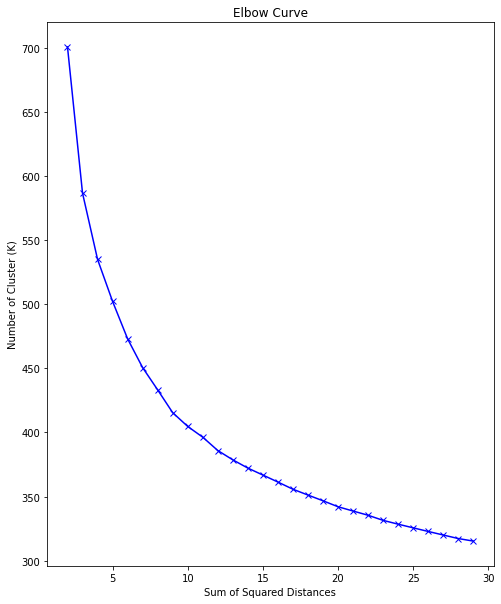

In [156]:
X = new_df2[embedding]

distortions =[]
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(8,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.xlabel('Sum of Squared Distances')
plt.ylabel('Number of Cluster (K)')
plt.title("Elbow Curve")


We notice that there is no discernable elbow to pick k

# Choosing K: The Silhouette Method

The silhouette score is computed on every datapoint in every cluster. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html


In [157]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


For n_clusters = 2 The average silhouette_score is : 0.3911759
For n_clusters = 3 The average silhouette_score is : 0.34566814
For n_clusters = 4 The average silhouette_score is : 0.15635534
For n_clusters = 5 The average silhouette_score is : 0.17143795
For n_clusters = 6 The average silhouette_score is : 0.17678759
For n_clusters = 7 The average silhouette_score is : 0.13090962
For n_clusters = 8 The average silhouette_score is : 0.13257942
For n_clusters = 9 The average silhouette_score is : 0.12022135
For n_clusters = 10 The average silhouette_score is : 0.10804849
For n_clusters = 11 The average silhouette_score is : 0.10145987


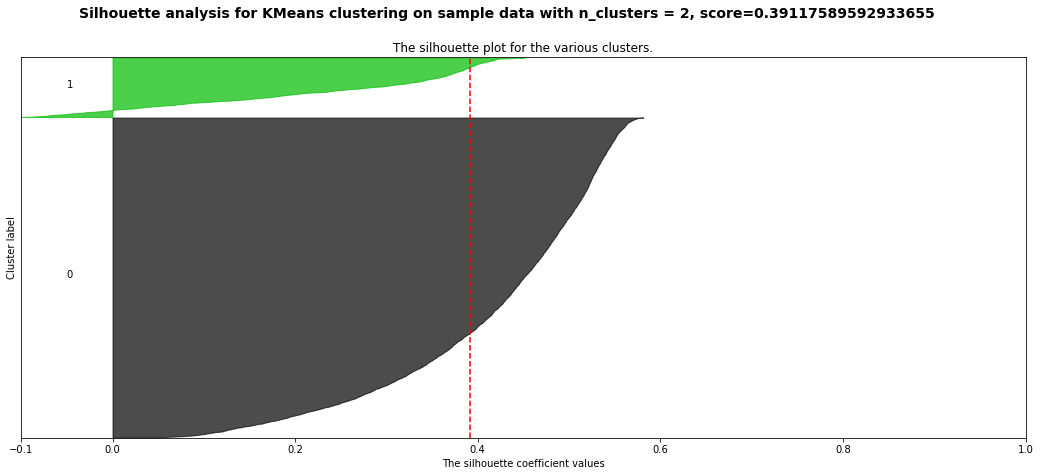

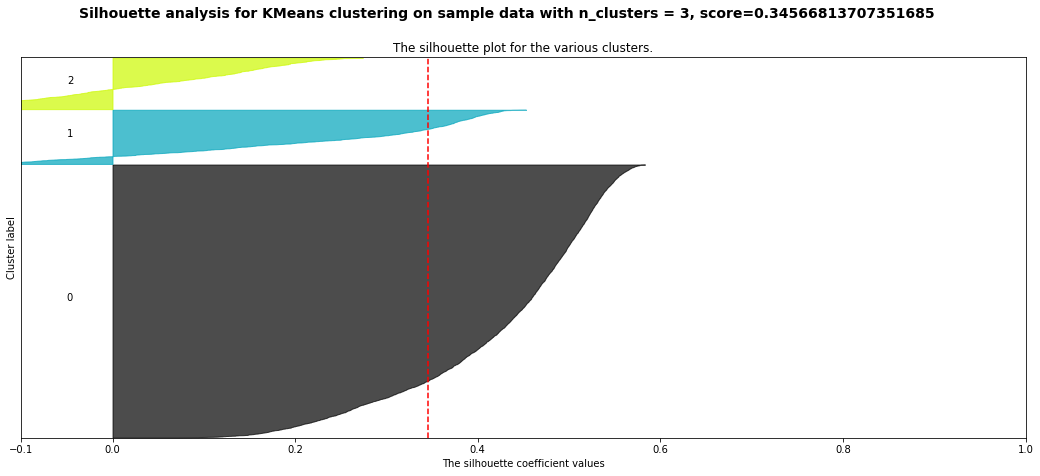

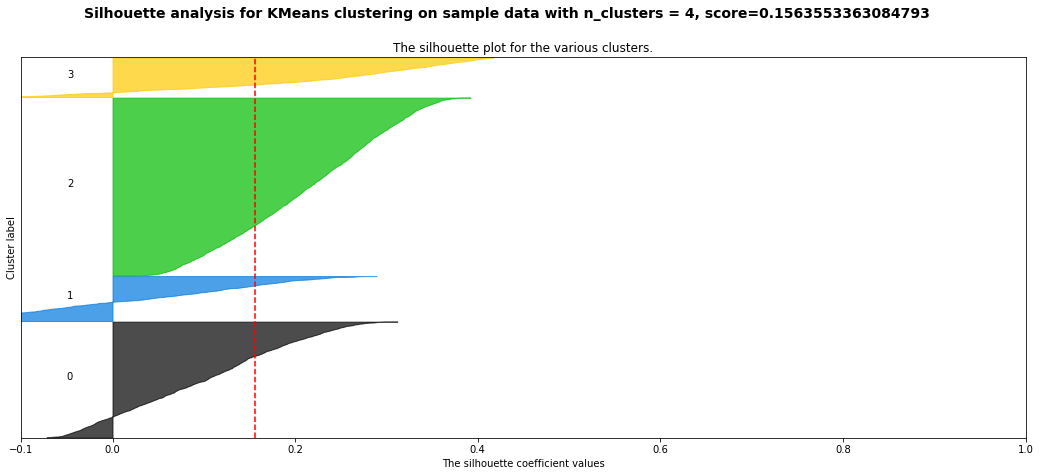

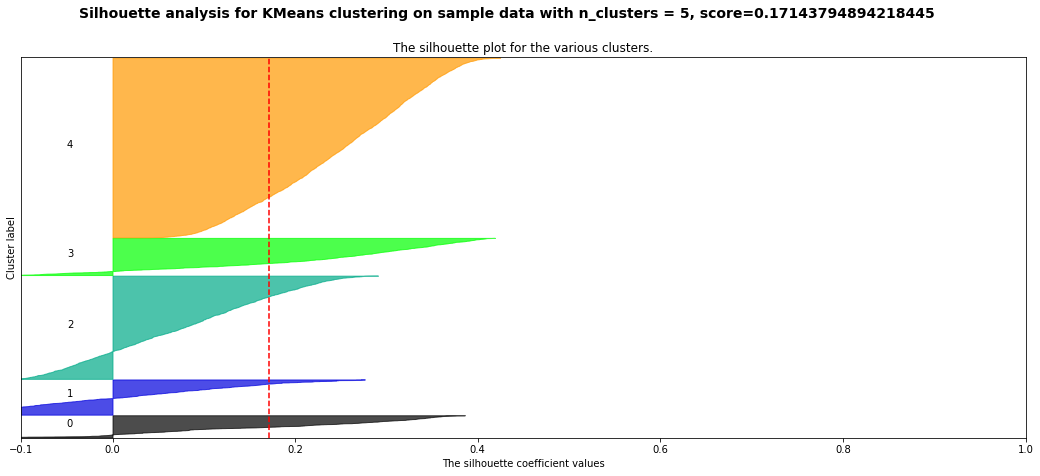

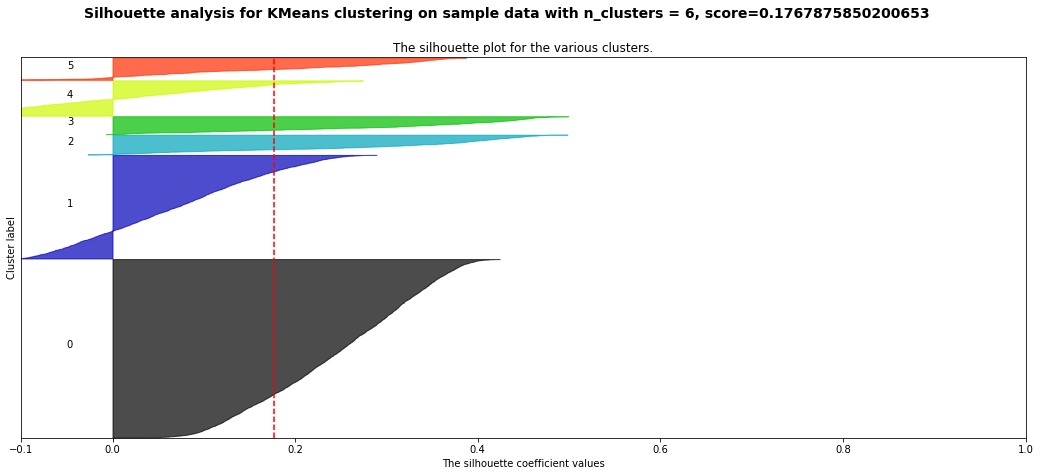

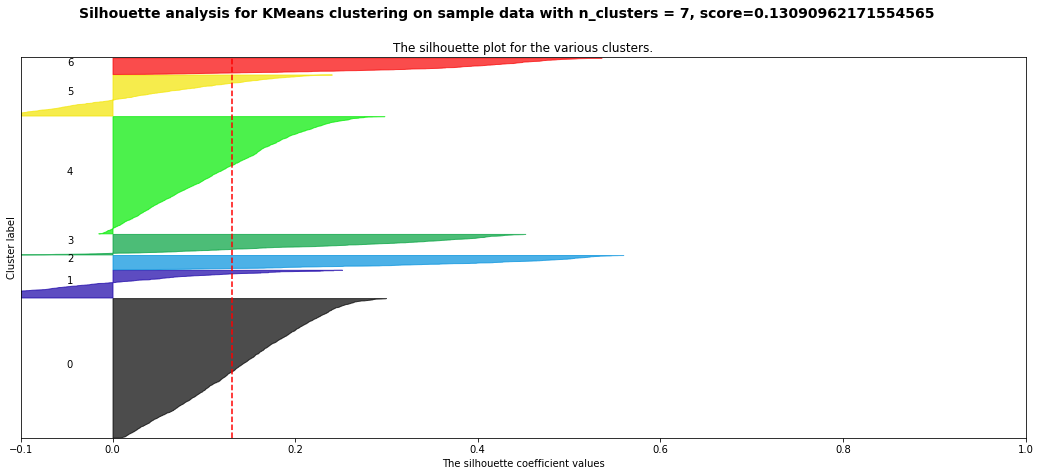

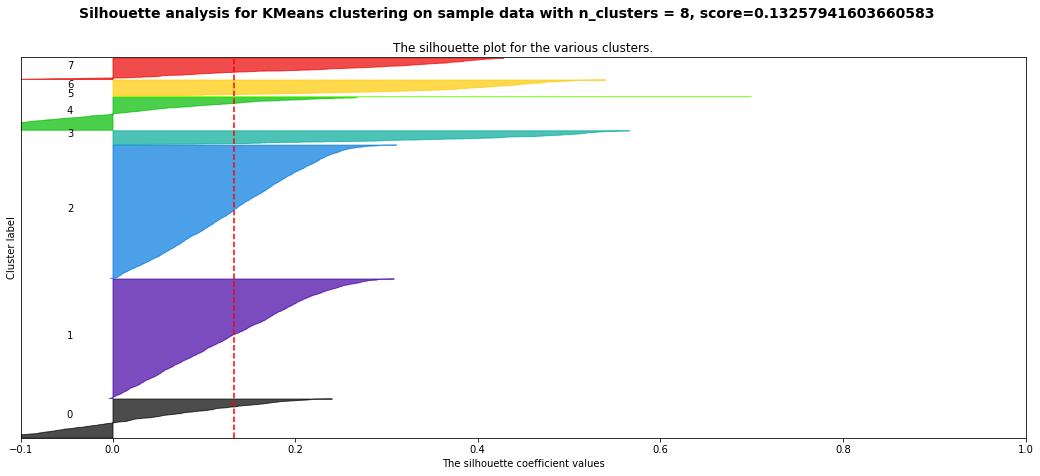

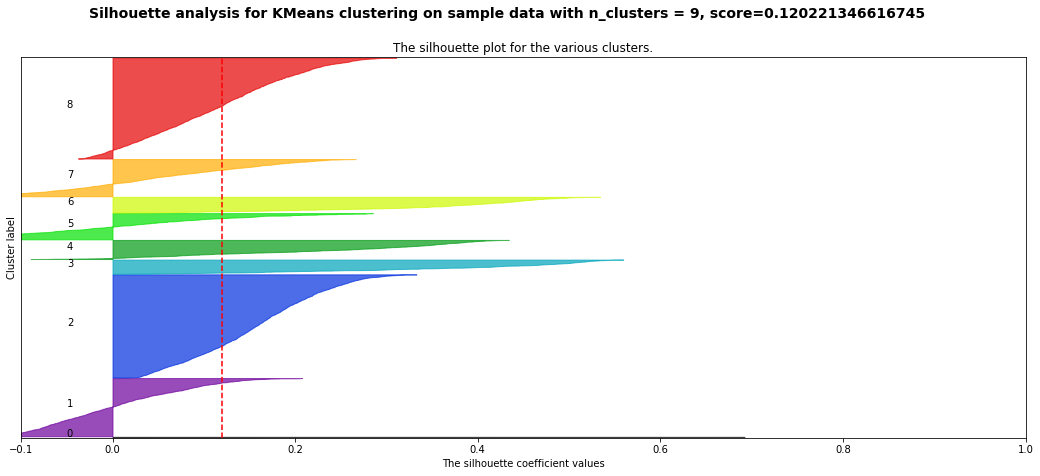

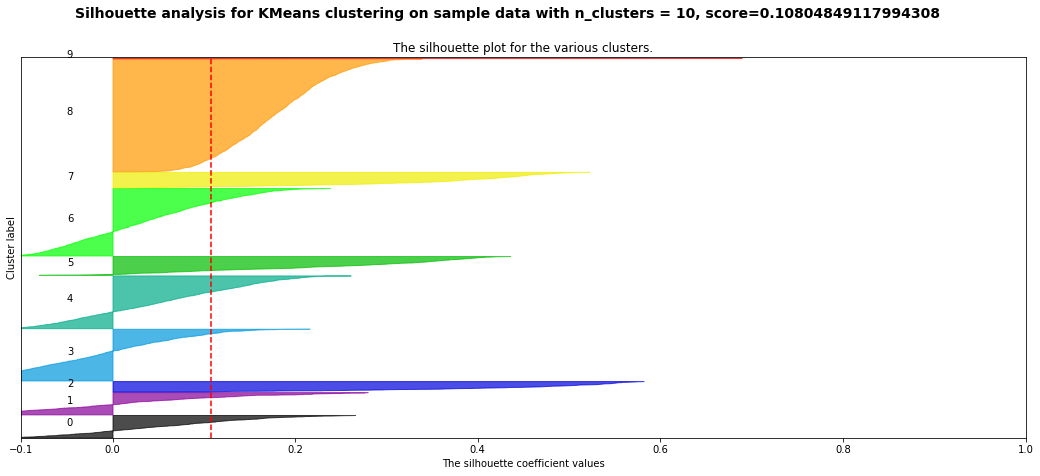

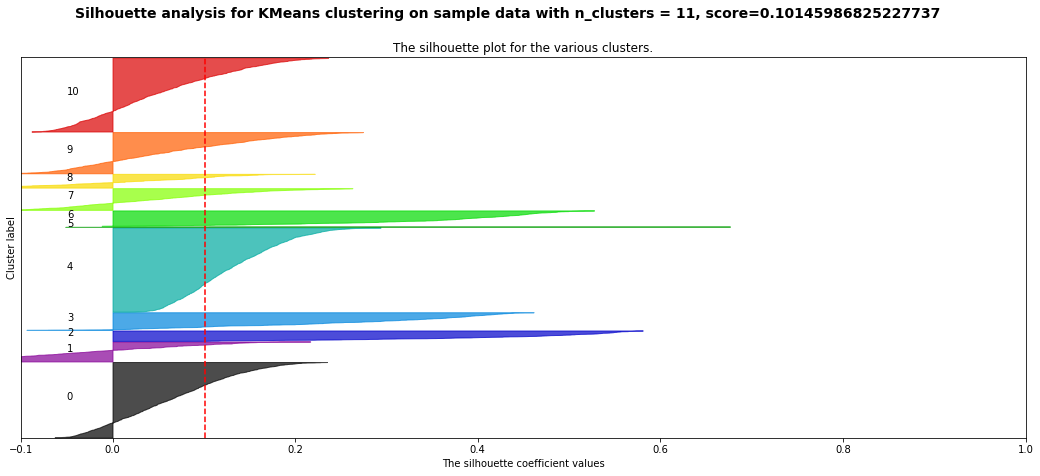

In [158]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
        f"with n_clusters = {n_clusters}, score={silhouette_avg}"),
        fontsize=14, fontweight='bold')


plt.show()

# Again, all scores are close to zero.

Using Cluster Analysis: The similar books will be grouped togther.

*Setting the number of group to 6 *: We use KMeans clustering algorithm in the form of MiniBatchKmeans

In [159]:
from sklearn.cluster import MiniBatchKMeans

# Cluster Profiling

In [160]:
new_df2[embedding].values.shape

(6996, 100)

Examine the most representative movie from each cluster to see if the clustering work effectively.

In [161]:
n_clus = 6
km = MiniBatchKMeans(n_clusters = n_clus, batch_size=6,random_state = 0, max_iter = 1000)


In [162]:
from sklearn.cluster import KMeans

# Create a new DataFrame with the features you'll be using for clustering
data_for_clustering = new_df2[embedding].values

# Define the number of clusters you want
num_clusters = 6

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit and predict
clusters = kmeans.fit_predict(data_for_clustering)

# This will return an array with the predicted cluster for each row in your DataFrame
new_df2['kmeans_cluster']= clusters

# Cluster Visualization

To visualize high-dimensional datasets we can use techniques known as dimensionality reduction.

t-Distributed Stochastic Neighbor Embedding (t-SNE)* is a technique for dimensionality reduction that allows to map an high-dimensional distribution to a 2-dim plane. Since this is computationally quite heavy, another dimensionality reduction technique is used in conjunction with it, e.g. Principal Component Analysis or PCA.

PCA is a technique for reducing the number of dimensions in a dataset while retaining most information. It analyzes the correlation between dimensions and attempts to provide a minimum number of variables that keeps the maximum amount of variation or information about the original data distribution.

we will first reduce our dimensions from 100 to 50 using PCA, and eventually using t-sne to visualize our clusters in 2 dimensions.

# Reducing Variables with PCA

In [163]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [164]:
pca_50 = PCA(n_components = 50)

In [165]:
pca_50_result = pca_50.fit_transform(new_df2[embedding])

In [166]:
pca_50_result 

array([[-1.90669328e-01, -6.23260485e-03, -5.64897470e-02, ...,
         1.14843970e-05, -1.31729830e-05, -7.89338956e-05],
       [ 3.86751704e-02, -1.38416424e-01,  3.74975847e-03, ...,
         2.80919139e-05,  4.19462449e-05,  2.51086894e-05],
       [-2.39516467e-01, -1.44916520e-01,  2.92777307e-02, ...,
        -6.68924185e-04,  1.42807595e-03, -9.31765418e-04],
       ...,
       [ 1.03135996e-01, -9.99186635e-02,  8.30107182e-02, ...,
        -4.69433035e-05, -2.77995805e-05, -3.46673260e-05],
       [-3.11160535e-01,  1.56510025e-01,  7.85377901e-03, ...,
         2.64365863e-05, -7.74172295e-05,  1.29965183e-05],
       [-1.46661296e-01, -9.60916504e-02,  1.36457477e-02, ...,
         5.04847339e-05, -3.57161516e-05, -3.40346705e-05]], dtype=float32)

In [167]:
#Cumulative variation for 50 principal components
np.sum(pca_50.explained_variance_ratio_)

0.99999684

# Execute TSNE Model

In [168]:
tsne = TSNE(n_components= 2, verbose= 0, perplexity= 30, n_iter = 2000)
tsne_pca_result = tsne.fit_transform(pca_50_result)

/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [169]:
new_df2['tsne_1'] = tsne_pca_result[:,0]
new_df2['tsne_2']= tsne_pca_result[:,1]

# Plot clusters in a 2-dimentional plane

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

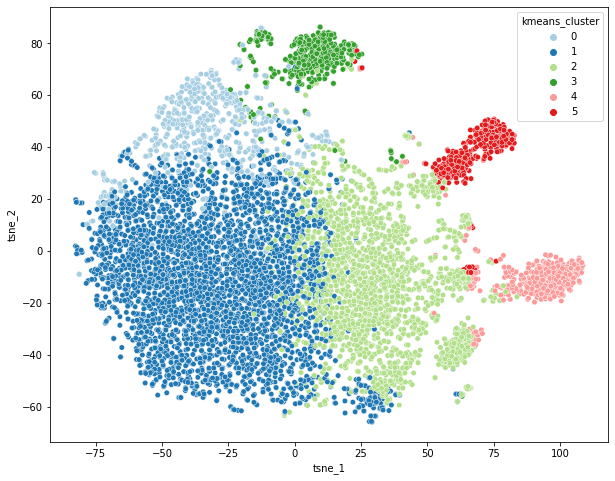

In [96]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'tsne_1', y = 'tsne_2', hue = 'kmeans_cluster', s= 30, palette = 'Paired', data = new_df2)

# Modeling

# One-hot Encode Clusters

In [99]:
cluster_onehot = pd.get_dummies(new_df2['kmeans_cluster'], prefix='cluster')

In [100]:
new_df2 = pd.concat([new_df2, cluster_onehot], axis = 1)

In [101]:
new_df2.head()

,title,tags,age,runtime,vote,rating,f_0,f_1,f_2,f_3,...,f_99,kmeans_cluster,tsne_1,tsne_2,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
1,Daydream Obsession,joe dain kris black julian coca danny dallas j...,20,87,120.0,2.8,-0.320629,0.379178,0.096438,-0.077834,...,-0.164829,2,39.336708,-8.034781,0,0,1,0,0,0
2,The Bonesetter,brett kelly sherry thurig anne marie frigon ma...,20,72,210.0,1.6,-0.383120,0.338434,0.080622,-0.112324,...,-0.179218,1,-15.515085,-22.713308,0,1,0,0,0,0
3,Carandiru,luiz carlos vasconcelos milton gonçalves ivan ...,20,145,18930.0,7.6,-0.388948,0.332266,0.148665,-0.182276,...,-0.167419,2,59.765083,-34.396523,0,0,1,0,0,0
4,DarkWolf,samaire armstrong ryan alosio andrea bogart ja...,20,94,1662.0,2.7,-0.384949,0.360239,0.119942,-0.119269,...,-0.186281,2,24.271160,-12.985089,0,0,1,0,0,0
5,Goddess of Mercy,wei zhao nicholas tse yunlong liu jianbin chen...,20,110,482.0,6.4,-0.365286,0.309878,0.154815,-0.029170,...,-0.106026,3,22.832415,76.983994,0,0,0,1,0,0


In [102]:
new_df2.columns

Index(['title', 'tags', 'age', 'runtime', 'vote', 'rating', 'f_0', 'f_1',
       'f_2', 'f_3',
       ...
       'f_99', 'kmeans_cluster', 'tsne_1', 'tsne_2', 'cluster_0', 'cluster_1',
       'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'],
      dtype='object', length=115)

# Recommendation Engine

In [103]:
features = new_df2[['rating', 'runtime', 'age', 'vote', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3','cluster_4', 'cluster_5']]

#features.set_index('title', inplace = True)

In [104]:
features.head()

,rating,runtime,age,vote,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
1,2.8,87,20,120.0,0,0,1,0,0,0
2,1.6,72,20,210.0,0,1,0,0,0,0
3,7.6,145,20,18930.0,0,0,1,0,0,0
4,2.7,94,20,1662.0,0,0,1,0,0,0
5,6.4,110,20,482.0,0,0,0,1,0,0


In [105]:
features.columns

Index(['rating', 'runtime', 'age', 'vote', 'cluster_0', 'cluster_1',
       'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'],
      dtype='object')

# Euclidean Distance Matrix

In [106]:
from scipy.spatial.distance import cdist

In [107]:

# Normalize the features to have zero mean and unit variance
features_norm = (features - features.mean())/ features.std()

In [108]:
features_norm

,rating,runtime,age,vote,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
1,-2.900378,-0.190342,-0.592733,-0.220171,-0.321645,-0.947557,1.623514,-0.248841,-0.234599,-0.22354
2,-3.845907,-0.535693,-0.592733,-0.219205,-0.321645,1.055195,-0.615860,-0.248841,-0.234599,-0.22354
3,0.881737,1.145018,-0.592733,-0.018129,-0.321645,-0.947557,1.623514,-0.248841,-0.234599,-0.22354
4,-2.979172,-0.029178,-0.592733,-0.203608,-0.321645,-0.947557,1.623514,-0.248841,-0.234599,-0.22354
5,-0.063792,0.339198,-0.592733,-0.216283,-0.321645,-0.947557,-0.615860,4.018053,-0.234599,-0.22354
...,...,...,...,...,...,...,...,...,...,...
9632,0.487766,0.799667,2.848783,0.285419,-0.321645,1.055195,-0.615860,-0.248841,-0.234599,-0.22354
9633,-0.378968,0.131987,2.848783,-0.191814,-0.321645,1.055195,-0.615860,-0.248841,-0.234599,-0.22354
9634,0.960531,0.983854,2.848783,0.183033,-0.321645,1.055195,-0.615860,-0.248841,-0.234599,-0.22354
9744,0.251384,-2.193382,-2.357613,-0.205595,-0.321645,-0.947557,1.623514,-0.248841,-0.234599,-0.22354


In [109]:
# Calculate the Euclidean distance matrix between all pairs of books
dist_matrix = cdist(features_norm, features_norm, 'euclidean')


In [110]:
dist_matrix

array([[0.        , 3.16845432, 4.0160181 , ..., 6.10882725, 4.1304709 ,
        4.1304709 ],
       [3.16845432, 0.        , 5.85163636, ..., 6.1169189 , 5.62818993,
        5.62818993],
       [4.0160181 , 5.85163636, 0.        , ..., 4.57629657, 3.83304108,
        3.83304108],
       ...,
       [6.10882725, 6.1169189 , 4.57629657, ..., 0.        , 6.84697871,
        6.84697871],
       [4.1304709 , 5.62818993, 3.83304108, ..., 6.84697871, 0.        ,
        0.        ],
       [4.1304709 , 5.62818993, 3.83304108, ..., 6.84697871, 0.        ,
        0.        ]])

In [111]:
dis_df = pd.DataFrame(dist_matrix, index = features_norm.index, columns = list(features_norm.index))

In [112]:
dis_df.index.name = 'movie_id'
dis_df

,1,2,3,4,5,6,7,8,9,10,...,9626,9627,9628,9629,9630,9632,9633,9634,9744,9745
movie_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,3.168454,4.016018,0.180157,5.616746,2.151769,6.809376,4.647890,4.767962,2.959128,...,5.378133,4.499229,4.669552,7.929647,6.167635,5.795266,5.228006,6.108827,4.130471,4.130471
2,3.168454,0.000000,5.851636,3.167624,6.106328,4.349130,7.999834,4.510348,6.503484,4.894773,...,5.122889,6.009290,6.157535,8.502543,6.178393,5.715119,4.930542,6.116919,5.628190,5.628190
3,4.016018,5.851636,0.000000,4.039772,4.980343,1.949172,5.468206,3.274515,0.931289,2.043658,...,4.866976,3.625572,3.694401,6.457810,4.641872,4.608304,4.849291,4.576297,3.833041,3.833041
4,0.180157,3.167624,4.039772,0.000000,5.644155,2.212113,6.814314,4.708667,4.812178,3.067718,...,5.423655,4.510056,4.720255,7.897735,6.206840,5.815121,5.258994,6.129178,4.270255,4.270255
5,5.616746,6.106328,4.980343,5.644155,0.000000,4.875154,7.494184,4.788773,5.175509,4.929614,...,5.865004,5.951626,5.941474,7.726960,5.975113,5.901643,5.848445,5.973751,5.731439,5.731439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,5.795266,5.715119,4.608304,5.815121,5.901643,4.811025,6.893755,3.600502,4.766224,4.854671,...,1.249073,3.125958,3.160976,5.545401,0.867853,0.000000,1.193640,0.517604,6.737038,6.737038
9633,5.228006,4.930542,4.849291,5.258994,5.848445,4.585329,7.375846,3.599692,5.093064,4.659624,...,0.487374,3.108604,3.073947,5.964595,1.608213,1.193640,0.000000,1.631088,6.475897,6.475897
9634,6.108827,6.116919,4.576297,6.129178,5.973751,4.975073,6.970671,3.649669,4.654498,4.973409,...,1.625969,3.251078,3.269831,5.450256,0.667714,0.517604,1.631088,0.000000,6.846979,6.846979


In [118]:
movie_id = 2
new_df2.iloc[movie_id]

dis_df[dis_df.index ==  movie_id]

,1,2,3,4,5,6,7,8,9,10,...,9626,9627,9628,9629,9630,9632,9633,9634,9744,9745
movie_id,,,,,,,,,,,,,,,,,,,,,
2,3.168454,0.0,5.851636,3.167624,6.106328,4.34913,7.999834,4.510348,6.503484,4.894773,...,5.122889,6.00929,6.157535,8.502543,6.178393,5.715119,4.930542,6.116919,5.62819,5.62819


In [119]:
dis_df[movie_id].sort_values(ascending = True)

movie_id
2        0.000000
1723     0.312175
1810     0.357496
4087     0.464381
1710     0.520609
          ...    
2594    19.951774
6374    21.214921
850     21.373542
801     27.187899
2960    30.323205
Name: 2, Length: 6996, dtype: float64

In [120]:
similar_movie = dis_df[movie_id].sort_values(ascending = True).head(11).index.to_list()[1:]
similar_movie

[1723, 1810, 4087, 1710, 2872, 2255, 208, 6650, 3482, 1443]

In [121]:
similar_titles =[]
for i in similar_movie:
    similar_titles.append(new_df2.loc[new_df2.index== i, 'title'].values[0])

similar_titles

['Carmilla, the Lesbian Vampire',
 'Vampiyaz',
 'The Bogus Witch Project',
 'Dracula 3000',
 'Avia Vampire Hunter',
 'The Underground Comedy Movie',
 'Guilty by Association',
 'Future War',
 'The Captives',
 'Unseen Evil 2']

In [114]:
new_df.director.head(20)


1                         [Thomas R. Smyth]
2                             [Brett Kelly]
3                          [Hector Babenco]
4                        [Richard Friedman]
5                                 [Ann Hui]
6                              [Lisa Niemi]
7                            [Bryan Singer]
8                          [Jonathan Demme]
9                         [Hamish Hamilton]
10          [Saul Blinkoff, Elliot M. Bour]
12                   [Beth McCarthy-Miller]
13    [Simon Hilton, John Lennon, Yoko Ono]
14                         [Frank Q. Dobbs]
16              [Sydney J. Bartholomew Jr.]
17                            [Stan Kellam]
18        [Lana Wachowski, Lilly Wachowski]
21                                  Unknown
23                      [Charles Wilkinson]
24          [Martyn Atkins, Keith Hobelman]
26                              [Ron Pitts]
Name: director, dtype: object

,director,title
0,Thomas R. Smyth,Dinosaur Planet
1,Brett Kelly,Daydream Obsession
2,Hector Babenco,The Bonesetter
3,Richard Friedman,Carandiru
4,Ann Hui,DarkWolf
...,...,...
7888,Alfred Hitchcock,Bruce Lee's Jeet Kune Do
7889,John Rich,Species
7890,Cy Endfield,Unzipped
7891,Unknown,Fluke
